---
title: "Shortbred results - Env/HostAssociated"
output: github_document
author: "Andrea Borbon"
editor_options: 
  chunk_output_type: console
---

## Table of Contents
* [Set-up](#Setup)
    * [Load libraries](#Load_libraries)
    * [Setup for plot labels](#Setup_for_plot_labels)
    * [Setup labels](#Setup_labels)
    * [Declare conflict preferences](#Declare_conflict_preferences)
* [Create phyloseq object](#Create_phyloseq_object)
    * [Abundance filter](#Abundance_filter)
* [Alpha diversity](#Alpha_diversity_analyses)
    * [Composition plots](#Composition_plots)
    * [Richness estimates](#Richness_estimates)
    * [Statistics on richness estimates](#Statistics_on_richness_estimates)
* [Beta diversity](#Beta_diversity)
    * [Ordination matrices](#Ordination_matrices)
    * [Ordination plots](#Ordination_plots)
    * [Statistics on group distances](#Statistics)
    * [Map alpha diversity into ordination](#Color_by_alpha_diversity)

### Setup

#### Load libraries

In [157]:
library(plyr)
library(tidyverse)
library(stringr)
library(phyloseq)
library(microViz)
library(metagMisc)
library(ggplot2)
library(ggsci)
library(viridis)
library(conflicted)
library(gridExtra)
library(permute)
library(grid) 
library(knitr)
library(cowplot)
library(vegan)

ERROR: Error in library(package, pos = pos, lib.loc = lib.loc, character.only = TRUE, : there is no package called ‘toc’


In [495]:
opts_chunk$set(cache=FALSE,warning=FALSE)

#### Setup for plot labels

In [148]:
#Setup for plot labels
#options(repr.matrix.max.cols = Inf)

In [7]:
#Setup for label sizes in plots
labels.x=theme(axis.title.x = element_text(size=18),
               axis.text.x = element_text(size=18,vjust=1,hjust=1,angle=45))

labels.x.pca=theme(axis.title.x = element_text(size=18),
               axis.text.x = element_text(size=18)) 

labels.y=theme(axis.title.y = element_text(size=18),
               axis.text.y= element_text(size=18))

labels.legend=theme(legend.text = element_text (size=18),
                    legend.title = element_text(size=18))

#### Declare conflict preferences

In [8]:
conflict_prefer("filter","dplyr")
conflict_prefer("rename","dplyr")
conflict_prefer("mutate","dplyr")
conflict_prefer("count","dplyr")

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::rename over any other package.
[conflicted] Will prefer dplyr::mutate over any other package.
[conflicted] Will prefer dplyr::count over any other package.


#### Import objects

In [9]:
otuAllSamples = read_tsv("/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/shortbred/matrixAll.tsv",col_names=T,show_col_types = FALSE) %>%
  rename(Accession="Family")
otuAllSamples_count=read_tsv("/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/shortbred/matrixAll_count.tsv",col_names=T,show_col_types=FALSE)%>%
rename(Accession="Family")
tax.markers=read_tsv("tax.markers.fla.tsv",col_names=T,show_col_types=FALSE)
all.tre=read_tree("/ebio/abt3_projects/small_projects/aborbon/Thesis_FlagellinDiversity/1_shortbred/fasttree_trimal_mafft_alignment_fla_sb.tre")

In [10]:
mappingAll=read_tsv("/tmp/global2/aborbon/metadataAllSamples.tsv",col_names=T,show_col_types = FALSE) %>%
mutate(category=if_else(biome_1=="Environmental","Environmental",
                if_else(biome_2=="Plants","Plants","Animal"))) %>%
mutate(mammals=if_else(biome_2=="Mammalia","Mammalia","Others"))

In [479]:
#write_tsv(mappingAll,"edgeR/mappingMetadataAll.txt")

## 1. Create phyloseq objects

In [11]:
#Create otu table from feature table - abundances
otus_AllSamples=otu_table(otuAllSamples[,2:ncol(otuAllSamples)],taxa_are_rows = TRUE)
rownames(otus_AllSamples)=otuAllSamples$Accession

In [12]:
#Create otu table from feature table - counts
otus_AllSamples_count=otu_table(otuAllSamples_count[,2:ncol(otuAllSamples_count)],taxa_are_rows = TRUE)
rownames(otus_AllSamples_count)=otuAllSamples_count$Accession

In [13]:
#Create sample data for phyloseq
mapping_ps_All=sample_data(mappingAll)
rownames(mapping_ps_All)=mappingAll$Sample

In [14]:
#Checking sample names in the mapping file
#sample_names(mapping_ps_All)

#taxonomy table
flags.tax=tax_table(as.matrix(tax.markers[,2:ncol(tax.markers)]))
rownames(flags.tax)=tax.markers$Accession

In [15]:
#Phylogeny of flagellins
flag.phy=phy_tree(all.tre)

In [16]:
#Creating phyloseq object + remove mislabeled sample
psAll=phyloseq(otus_AllSamples,mapping_ps_All,flags.tax,flag.phy)
psAll

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9963 taxa and 809 samples ]
sample_data() Sample Data:       [ 809 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 9963 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9963 tips and 9945 internal nodes ]

In [17]:
#Creating phyloseq object - counts
psAll_count=phyloseq(otus_AllSamples_count,mapping_ps_All,flags.tax,flag.phy)
psAll_count

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9963 taxa and 809 samples ]
sample_data() Sample Data:       [ 809 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 9963 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9963 tips and 9945 internal nodes ]

In [18]:
to.remove=select(filter(as_tibble(psAll@sam_data),family=="Solanaceae"),Sample)
to.remove

Sample     
1  SRR10527383
2  SRR10527384
3  SRR10527386
4  SRR10527387
5  SRR10527389
6  SRR10527390
7  SRR10527391
8  SRR10527392
9  SRR10527393
10 SRR10527394
11 SRR10527395
12 SRR10527396
13 SRR11092499
14 SRR11092502
15 SRR11092506
16 SRR11092509
17 SRR11092512

In [19]:
psAll = subset_samples(psAll,!(Sample %in% to.remove$Sample))
psAll_count = subset_samples(psAll_count,!(Sample %in% to.remove$Sample))

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [20]:
psAll
psAll_count

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9963 taxa and 792 samples ]
sample_data() Sample Data:       [ 792 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 9963 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9963 tips and 9945 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9963 taxa and 792 samples ]
sample_data() Sample Data:       [ 792 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 9963 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9963 tips and 9945 internal nodes ]

In [807]:
saveRDS(psAll,"psAll.rds")
saveRDS(psAll_count,"psAll_count.rds")

## 2. Abundance filtering

In [98]:
filter_taxa_All = phyloseq_filter_prevalence(psAll_count, prev.trh = 0.05, abund.trh = 10,
  threshold_condition = "OR", abund.type = "mean")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [143]:
#Filter based on prevalence
#Prevalence threshold=0.05
#Prevalence threshold=0.01
#Prevalence threshold=0.001

filter_taxa_All_count = phyloseq_filter_prevalence(psAll_count, prev.trh = 0.05, abund.trh = 10,
  threshold_condition = "OR", abund.type = "mean")
filter_taxa_All_count=prune_samples(sample_sums(filter_taxa_All_count)>0,filter_taxa_All_count)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [144]:
filter_taxa_All_count

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1454 taxa and 779 samples ]
sample_data() Sample Data:       [ 779 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1454 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1454 tips and 1453 internal nodes ]

In [145]:
count(as_tibble(filter_taxa_All_count@sam_data),category)

category      n  
1 Animal        559
2 Environmental 133
3 Plants         87

In [436]:
#write.tree(filter_taxa_All_count@phy_tree,"edgeR/filterTaxa_Allcount.tre")

In [420]:
# Flagellins in plants
flas.plants = ps_filter(filter_taxa_All_count,category=="Plants")
flas.present.plants = phyloseq_filter_prevalence(flas.plants, abund.trh = 1,
  threshold_condition = "OR", abund.type = "total")
write.tree(flas.present.plants@phy_tree,"edgeR/flags.tre_Plants.tre")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [421]:
# Flagellins in animals
flas.animals = ps_filter(filter_taxa_All_count,category=="Animal")
flas.present.animals = phyloseq_filter_prevalence(flas.animals, abund.trh = 1,
  threshold_condition = "OR", abund.type = "total")
write.tree(flas.present.animals@phy_tree,"edgeR/flags.tre_Animals.tre")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [422]:
# Flagellins in environmental
flas.env = ps_filter(filter_taxa_All_count,category=="Environmental")
flas.present.env = phyloseq_filter_prevalence(flas.env, abund.trh = 1,
  threshold_condition = "OR", abund.type = "total")
write.tree(flas.present.env@phy_tree,"edgeR/flags.tre_Env.tre")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [1017]:
#saveRDS(filter_taxa_All,"filter_taxa_All.rds")
#saveRDS(filter_taxa_All_count,"filter_taxa_All_count.rds")

## 2. Alpha diversity analyses

### Composition plots

In [119]:
filter_taxa_All_count

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1454 taxa and 779 samples ]
sample_data() Sample Data:       [ 779 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1454 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1454 tips and 1453 internal nodes ]

In [45]:
top.100=phyloseq_filter_top_taxa(filter_taxa_All_count,n=100)
top.30=phyloseq_filter_top_taxa(filter_taxa_All_count,n=30)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [46]:
top.100.barplot=plot_bar(transform_sample_counts(top.100, function(x) (1E6 * x / sum(x))),
fill="Phylum")+
                         geom_bar(position="stack",stat="identity")+
                         facet_wrap(~biome_1,scales="free")+
                         theme_minimal()+
                         labels.legend+
                         theme(axis.text.x = element_blank())+
                         scale_fill_npg()+
                         ggtitle("Top 100 taxa")

top.30.barplot=plot_bar(transform_sample_counts(top.30, function(x) (1E6 * x / sum(x))),
fill="Phylum")+
                         geom_bar(position="stack",stat="identity")+
                         facet_wrap(~biome_1,scales="free")+
                         theme_minimal()+
                         labels.legend+
                         theme(axis.text.x = element_blank())+
                         scale_fill_npg()+
                         ggtitle("Top 30 taxa")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" 

Warning message:
“Removed 2700 rows containing missing values (position_stack).”
Warning message:
“Removed 2700 rows containing missing values (position_stack).”
Warning message:
“Removed 900 rows containing missing values (position_stack).”
Warning message:
“Removed 900 rows containing missing values (position_stack).”


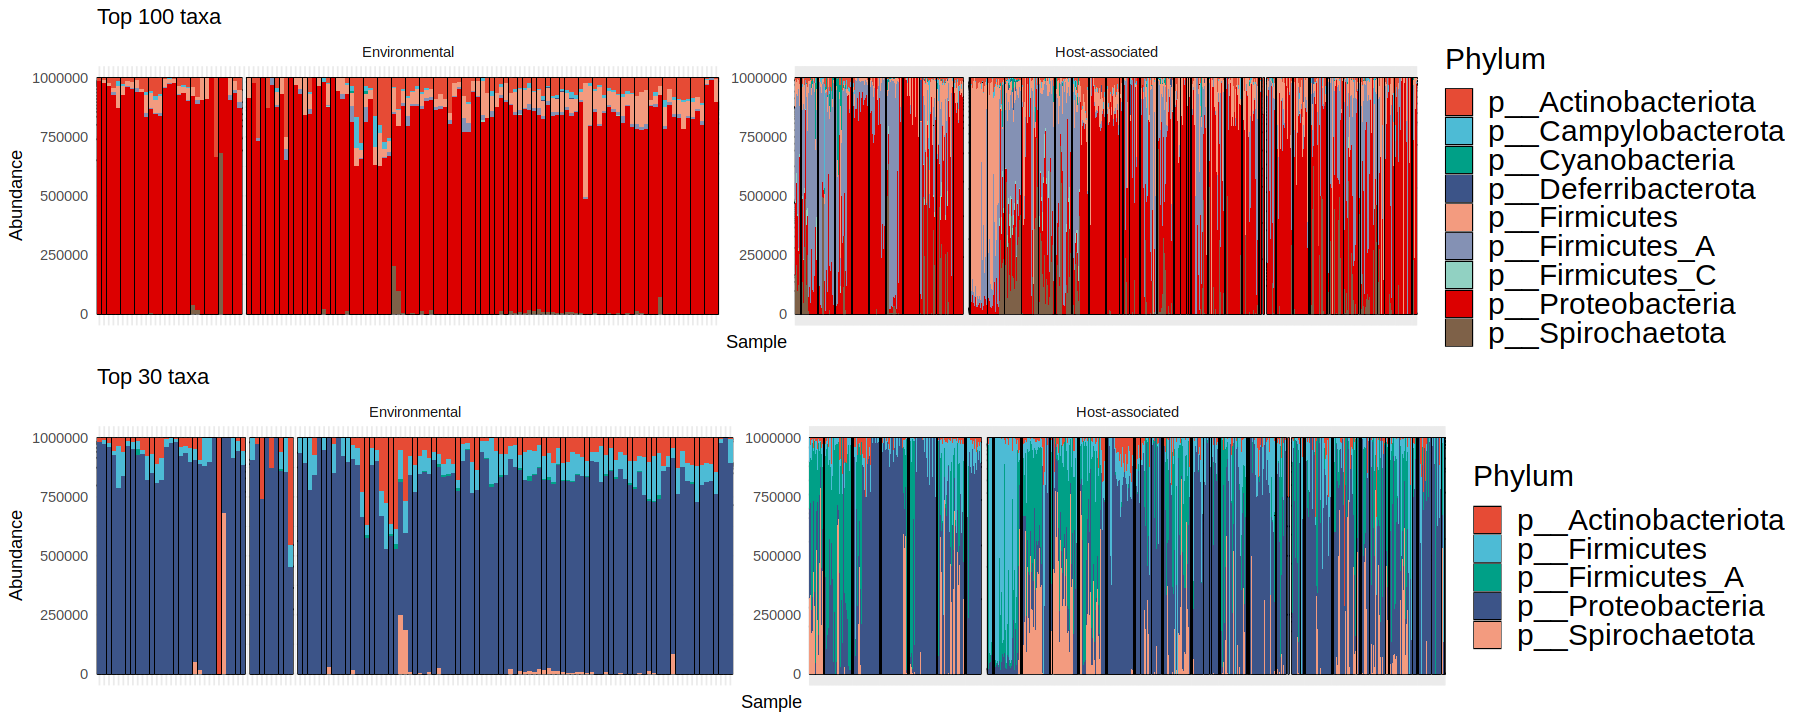

In [47]:
options(repr.plot.width=15,repr.plot.height=6)
grid.arrange(top.100.barplot,
             top.30.barplot,
             nrow=2)

### Richness estimates

In [134]:
richness.estimates=mutate(as_tibble(filter_taxa_All_count@sam_data),estimate_richness(filter_taxa_All_count, split = TRUE, measures = c("Observed", "Chao1","Shannon", "Simpson")))

In [135]:
head(richness.estimates)

Sample     Dataset      biome_0 biome_1       biome_2 biome_3    biome_4
1 ERS1030529 MGYS00000599 root    Environmental Aquatic Freshwater Ice    
2 ERS1030531 MGYS00000599 root    Environmental Aquatic Freshwater Ice    
3 ERS1030532 MGYS00000599 root    Environmental Aquatic Freshwater Ice    
4 ERS1030533 MGYS00000599 root    Environmental Aquatic Freshwater Ice    
5 ERS1030534 MGYS00000599 root    Environmental Aquatic Freshwater Ice    
6 ERS1030535 MGYS00000599 root    Environmental Aquatic Freshwater Ice    
  family category      mammals Observed Chao1    se.chao1 Shannon  Simpson  
1 NA     Environmental Others  130      197.0286 21.35376 3.930441 0.9288466
2 NA     Environmental Others  131      220.5161 27.79842 3.994385 0.9348073
3 NA     Environmental Others  117      238.7143 40.34829 3.720285 0.9091367
4 NA     Environmental Others  102      221.8947 41.16536 4.065758 0.9587932
5 NA     Environmental Others  178      335.8125 43.67901 4.115776 0.9586164
6 NA     Environmental Others  165      417.9545 73.93484 3.927132 0.9480603

### Statistics on richness estimates

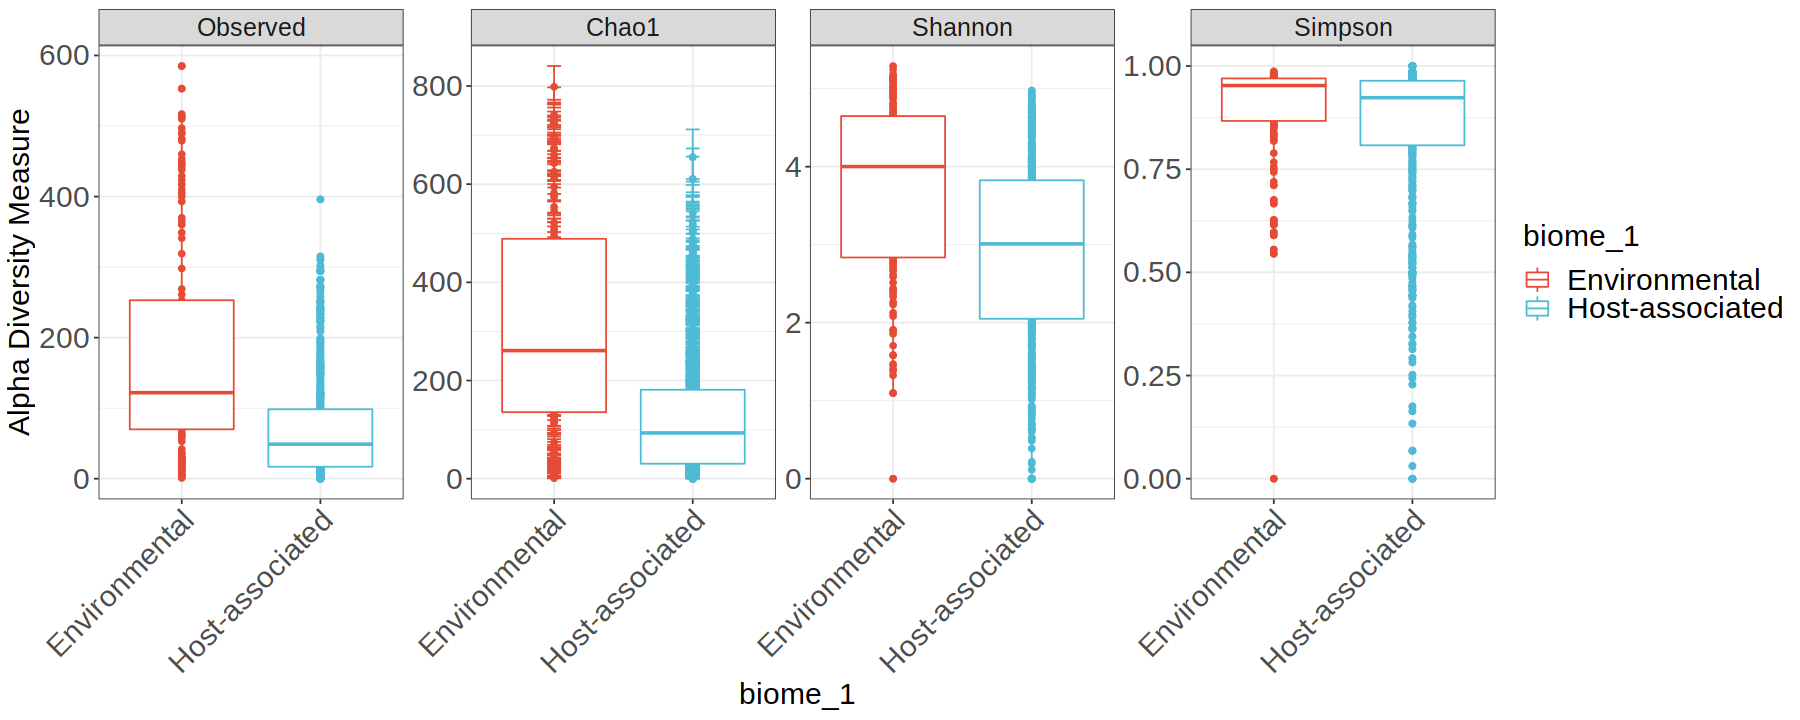

In [101]:
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(filter_taxa_All_count,x="biome_1",measures=c("Observed","Chao1","Shannon","Simpson"),color="biome_1")+
theme_bw()+
geom_boxplot()+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

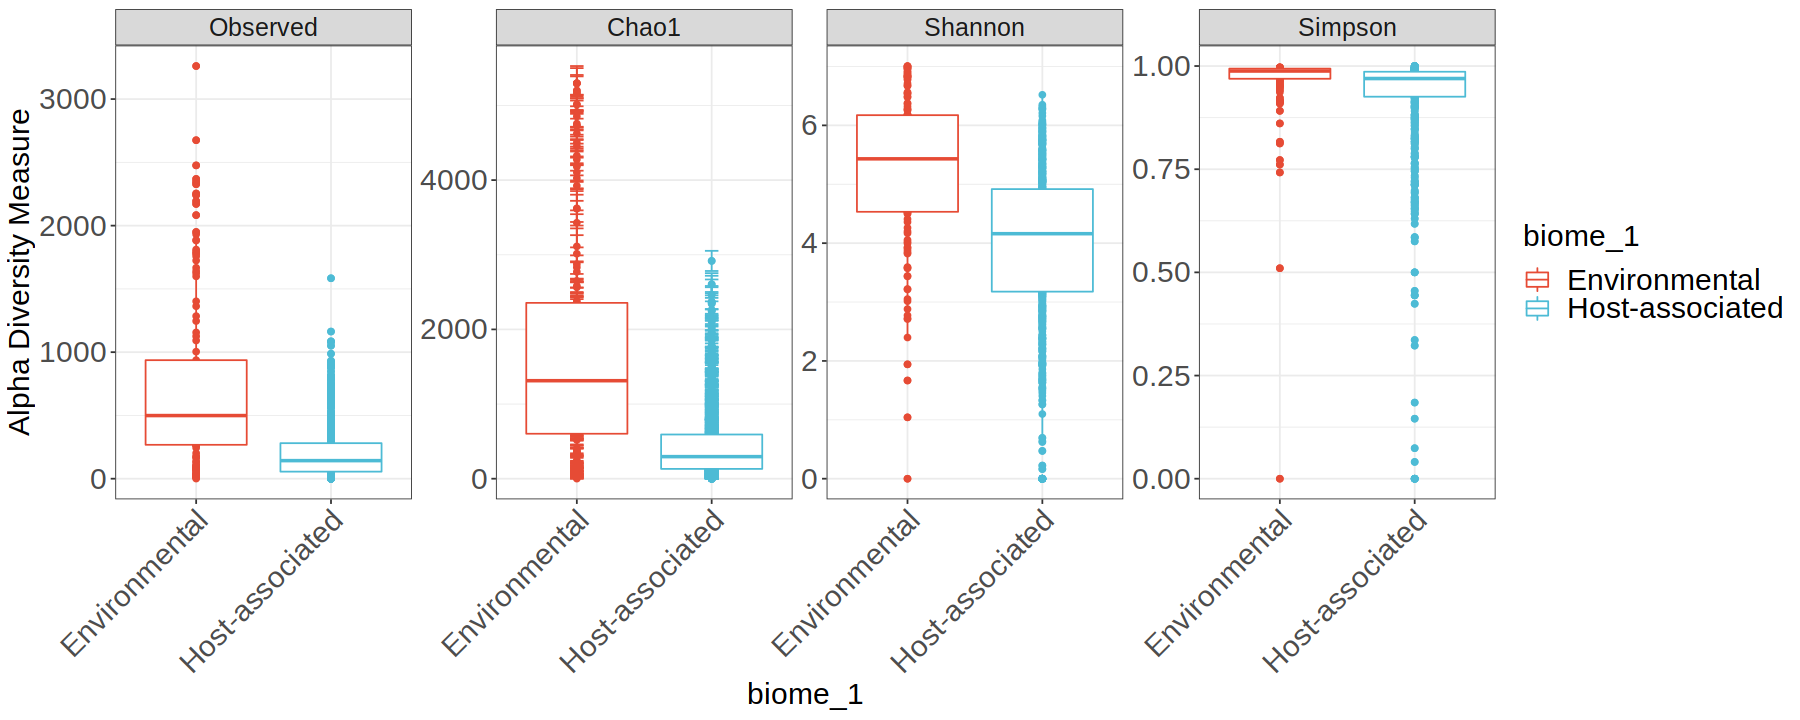

In [94]:
#Without performing abundance filter
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(psAll_count,x="biome_1",measures=c("Observed","Chao1","Shannon","Simpson"),color="biome_1")+
theme_bw()+
geom_boxplot()+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

#### I. Kruskal tests by biome_1

In [121]:
dplyr::count(as_tibble(filter_taxa_All_count@sam_data),biome_1)

biome_1         n  
1 Environmental   133
2 Host-associated 646

In [52]:
kruskal.test(Observed~biome_1,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Observed by biome_1
Kruskal-Wallis chi-squared = 74.122, df = 1, p-value < 2.2e-16


In [53]:
kruskal.test(Chao1~biome_1,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Chao1 by biome_1
Kruskal-Wallis chi-squared = 83.223, df = 1, p-value < 2.2e-16


In [54]:
kruskal.test(Shannon~biome_1,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Shannon by biome_1
Kruskal-Wallis chi-squared = 52.421, df = 1, p-value = 4.48e-13


In [55]:
kruskal.test(Simpson~biome_1,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Simpson by biome_1
Kruskal-Wallis chi-squared = 10.172, df = 1, p-value = 0.001426


#### II. Kruskal tests by category

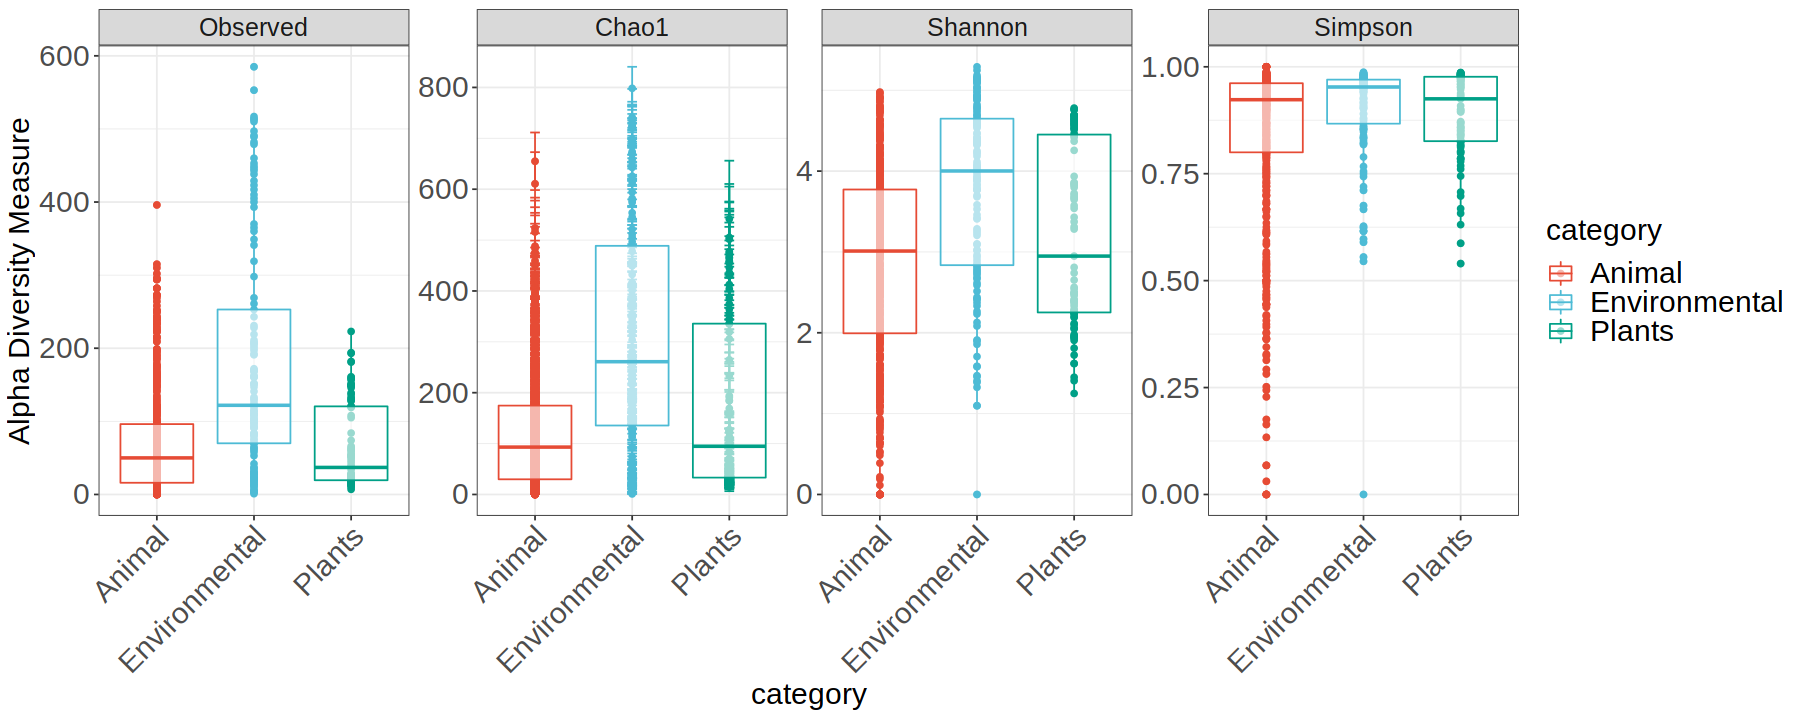

In [93]:
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(filter_taxa_All_count,x="category",measures=c("Observed","Chao1","Shannon","Simpson"),color="category")+
theme_bw()+
geom_boxplot(alpha=0.6)+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

In [122]:
dplyr::count(as_tibble(filter_taxa_All_count@sam_data),biome_2)

biome_2        n  
1 Actinopterygii  51
2 Amphibia        11
3 Aquatic        102
4 Aves            96
5 Mammalia       387
6 Plants          87
7 Reptilia        14
8 Terrestrial     31

In [57]:
kruskal.test(Observed~category,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Observed by category
Kruskal-Wallis chi-squared = 74.14, df = 2, p-value < 2.2e-16


In [58]:
kruskal.test(Chao1~category,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Chao1 by category
Kruskal-Wallis chi-squared = 86.317, df = 2, p-value < 2.2e-16


In [59]:
kruskal.test(Shannon~category,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Shannon by category
Kruskal-Wallis chi-squared = 56.842, df = 2, p-value = 4.538e-13


In [60]:
kruskal.test(Simpson~category,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Simpson by category
Kruskal-Wallis chi-squared = 13.769, df = 2, p-value = 0.001023


#### III. Wilcoxon tests by category

In [61]:
pairwise.wilcox.test(richness.estimates$Observed, richness.estimates$category, p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates$Observed and richness.estimates$category 

              Animal  Environmental
Environmental < 2e-16 -            
Plants        0.88    6.1e-09      

P value adjustment method: fdr 

In [62]:
pairwise.wilcox.test(richness.estimates$Chao1, richness.estimates$category, p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates$Chao1 and richness.estimates$category 

              Animal  Environmental
Environmental < 2e-16 -            
Plants        0.089   2.5e-06      

P value adjustment method: fdr 

In [63]:
pairwise.wilcox.test(richness.estimates$Shannon, richness.estimates$category, p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates$Shannon and richness.estimates$category 

              Animal  Environmental
Environmental 2.6e-13 -            
Plants        0.03326 0.00056      

P value adjustment method: fdr 

In [64]:
pairwise.wilcox.test(richness.estimates$Simpson, richness.estimates$category, p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates$Simpson and richness.estimates$category 

              Animal Environmental
Environmental 0.0012 -            
Plants        0.1100 0.6570       

P value adjustment method: fdr 

## 3. Beta diversity

Add alpha diversity measures to samples data. Then include it to the phyloseq object

In [152]:
#tmp mapping table with richness estimates
mapping_ps_All_richness=sample_data(richness.estimates)
rownames(mapping_ps_All_richness)=richness.estimates$Sample

filter_taxa_All_count=phyloseq(filter_taxa_All_count@otu_table,mapping_ps_All_richness,filter_taxa_All@tax_table,filter_taxa_All@phy_tree)
filter_taxa_All_count

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1454 taxa and 779 samples ]
sample_data() Sample Data:       [ 779 samples by 15 sample variables ]
tax_table()   Taxonomy Table:    [ 1454 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1454 tips and 1453 internal nodes ]

In [154]:
head(filter_taxa_All_count@sam_data)

Sample     Dataset      biome_0 biome_1       biome_2 biome_3   
ERS1030529 ERS1030529 MGYS00000599 root    Environmental Aquatic Freshwater
ERS1030531 ERS1030531 MGYS00000599 root    Environmental Aquatic Freshwater
ERS1030532 ERS1030532 MGYS00000599 root    Environmental Aquatic Freshwater
ERS1030533 ERS1030533 MGYS00000599 root    Environmental Aquatic Freshwater
ERS1030534 ERS1030534 MGYS00000599 root    Environmental Aquatic Freshwater
ERS1030535 ERS1030535 MGYS00000599 root    Environmental Aquatic Freshwater
           biome_4 family category      mammals Observed Chao1    se.chao1
ERS1030529 Ice     NA     Environmental Others  130      197.0286 21.35376
ERS1030531 Ice     NA     Environmental Others  131      220.5161 27.79842
ERS1030532 Ice     NA     Environmental Others  117      238.7143 40.34829
ERS1030533 Ice     NA     Environmental Others  102      221.8947 41.16536
ERS1030534 Ice     NA     Environmental Others  178      335.8125 43.67901
ERS1030535 Ice     NA     Environmental Others  165      417.9545 73.93484
           Shannon  Simpson  
ERS1030529 3.930441 0.9288466
ERS1030531 3.994385 0.9348073
ERS1030532 3.720285 0.9091367
ERS1030533 4.065758 0.9587932
ERS1030534 4.115776 0.9586164
ERS1030535 3.927132 0.9480603

### Ordination matrices

In [182]:
#Distance matrices for anosim
jaccard.dist = distance(filter_taxa_All_count,method="jaccard",type="samples")
unifrac.dist = distance(filter_taxa_All_count,method="unifrac",type="samples")
bray.dist = distance(filter_taxa_All_count,method="bray",type="samples")
wunifrac.dist = distance(filter_taxa_All_count,method="wunifrac",type="samples")

In [155]:
unifrac.dist.filt = ordinate(filter_taxa_All_count,distance="unifrac",method="PCoA")
wunifrac.dist.filt = ordinate(filter_taxa_All_count,distance="wunifrac",method="PCoA")
jaccard.dist.filt = ordinate(filter_taxa_All_count,distance="jaccard",method="PCoA")
bray.dist.filt = ordinate(filter_taxa_All_count,distance="bray",method="PCoA")

### Ordination plots

In [68]:
#Function to plot specificing ordination matrix and mapping value
plot_color_by = function(physeq_obj,ordination.matrix,color_by){
    #Get the name of the metric for the plot title
    metric = deparse(substitute(ordination.matrix))
    title = strsplit(metric,".",fixed=TRUE)[[1]][1]
    title = paste(toupper(substr(title,1,1)),substr(title,2,nchar(title)),sep = "")
    #str_to_title(title) --> doesn't work, stringr package corrupt, meanwhile use another option
    #Create ordination plot
    ordination.plot  = plot_ordination(
                 physeq = physeq_obj,
                 ordination = ordination.matrix,
                 type = "samples",
                 color = color_by)+
                theme_bw()+
                geom_point(size = 3)+
                theme(legend.position = "top")+
                scale_color_npg() +
                ggtitle(title)+
                theme(plot.title = element_text(hjust = 0.5))+
                labels.x + labels.y + labels.legend
return(ordination.plot)
    
}

#### By biome 1

In [127]:
#Generate plots
jaccard.biome1 = plot_color_by(filter_taxa_All_count,jaccard.dist.filt,"biome_1")
bray.biome1 = plot_color_by(filter_taxa_All_count,bray.dist.filt,"biome_1")
unifrac.biome1 = plot_color_by(filter_taxa_All_count,unifrac.dist.filt,"biome_1")
wunifrac.biome1 = plot_color_by(filter_taxa_All_count,wunifrac.dist.filt,"biome_1")

In [ ]:
options(repr.plot.width=14,repr.plot.height=12)
grid.arrange(jaccard.biome1,
             bray.biome1,
             unifrac.biome1,
             wunifrac.biome1,
             nrow=2)

##### ANOSIM

In [176]:
biome_1.var = get_variable(filter_taxa_All_count,"biome_1")

In [183]:
biome1.anosim.jacc = anosim(jaccard.dist,biome_1.var)
biome1.anosim.unifrac = anosim(unifrac.dist,biome_1.var)
biome1.anosim.bray = anosim(bray.dist,biome_1.var)
biome1.anosim.wunifrac = anosim(wunifrac.dist,biome_1.var)

In [187]:
anosim.results = data.frame(
    col = c("significance","R_statistic"),
    "jaccard" = c(biome1.anosim.jacc$signif,biome1.anosim.jacc$statistic),
    "bray" = c(biome1.anosim.bray$signif,biome1.anosim.bray$statistic),
    "unifrac" = c(biome1.anosim.unifrac$signif,biome1.anosim.unifrac$statistic),
    "wunifrac" = c(biome1.anosim.wunifrac$signif,biome1.anosim.wunifrac$statistic))

In [188]:
anosim.results

col          jaccard     bray        unifrac    wunifrac  
1 significance  1.00000000  0.99900000 0.01300000  1.0000000
2 R_statistic  -0.08426305 -0.08426305 0.05840431 -0.1488136

In [189]:
biome1.anosim.jacc


Call:
anosim(x = jaccard.dist, grouping = biome_1.var) 
Dissimilarity: jaccard 

ANOSIM statistic R: -0.08426 
      Significance: 1 

Permutation: free
Number of permutations: 999


#### By category

In [909]:
#Generate plots
jaccard.category = plot_color_by(filter_taxa_All_count,jaccard.dist.filt,"category")
bray.category = plot_color_by(filter_taxa_All_count,bray.dist.filt,"category")
unifrac.category = plot_color_by(filter_taxa_All_count,unifrac.dist.filt,"category")
wunifrac.category = plot_color_by(filter_taxa_All_count,wunifrac.dist.filt,"category")

In [3]:
options(repr.plot.width=14,repr.plot.height=12)
grid.arrange(jaccard.category,
             bray.category,
             unifrac.category,
             wunifrac.category,
             nrow=2)

ERROR: Error in grid.arrange(jaccard.category, bray.category, unifrac.category, : could not find function "grid.arrange"


##### ANOSIM

In [ ]:
category.var = get_variable(filter_taxa_All_count,"category")

In [ ]:
cat.anosim.jacc = anosim(jaccard.dist,category.var)
cat.anosim.unifrac = anosim(unifrac.dist,category.var)
cat.anosim.bray = anosim(bray.dist,category.var)
cat.anosim.wunifrac = anosim(wunifrac.dist,category.var)

In [ ]:
anosim.results_cat = data.frame(
    col = c("distance_method","significance","R_statistic"),
    "jaccard" = c(cat.anosim.jacc$signif,cat.anosim.jacc$statistic),
    "bray" = c(cat.anosim.bray$signif,cat.anosim.bray$statistic)
    "unifrac" = c(cat.anosim.unifrac$signif,cat.anosim.unifrac$statistic),
    "wunifrac" = c(cat.anosim.wunifrac$signif,cat.anosim.wunifrac$statistic))

#### Cowplots for PCoAs

##### Jaccard distance

In [1025]:
jaccard.vector = as.data.frame(jaccard.dist.filt$vectors) %>% 
rownames_to_column(var="Sample")%>%
inner_join(mapping_ps_All_richness)

Joining, by = "Sample"


In [1286]:
jaccard.axis1 = ggplot(data=jaccard.vector, aes(x=Axis.1,fill=category))+
    geom_density(alpha=0.5)+
    scale_fill_npg()+
    theme_void()+
    guides(fill="none")+theme(axis.title.x=element_blank(),
				axis.text=element_blank(),
				axis.line=element_blank(),
				axis.ticks=element_blank())

jaccard.axis2 = ggplot(data=jaccard.vector, aes(x=Axis.2,fill=category))+
geom_density(alpha=0.5)+
    scale_fill_npg()+
    theme_void()+
    guides(fill="none")+coord_flip()+theme(axis.title.y=element_blank(),
				axis.text=element_blank(),
				axis.line=element_blank(),
				axis.ticks=element_blank())

In [1211]:
jaccard.cat = jaccard.category+
theme(legend.position="bottom")+
labs(title=NULL)+
labels.x + labels.y

In [1287]:
jaccard.axis1 = jaccard.axis1 + theme(plot.margin = unit(c(0.5, -0.5, 0, 1.7), "cm"))
jaccard.cat = jaccard.cat + theme(plot.margin = unit(c(0, 0, 0.5, 0.5), "cm"))
jaccard.axis2 = jaccard.axis2 + theme(plot.margin = unit(c(-0.6, 0.5, 2.7, 0), "cm"))


In [1288]:
axis1 = plot_grid(jaccard.axis1, jaccard.cat, ncol = 1, rel_heights = c(1, 3))
axis2 = plot_grid(NULL, jaccard.axis2, ncol = 1, rel_heights = c(1, 3))
all.plot.jaccard = plot_grid(axis1, axis2, ncol = 2, rel_widths = c(3, 1))

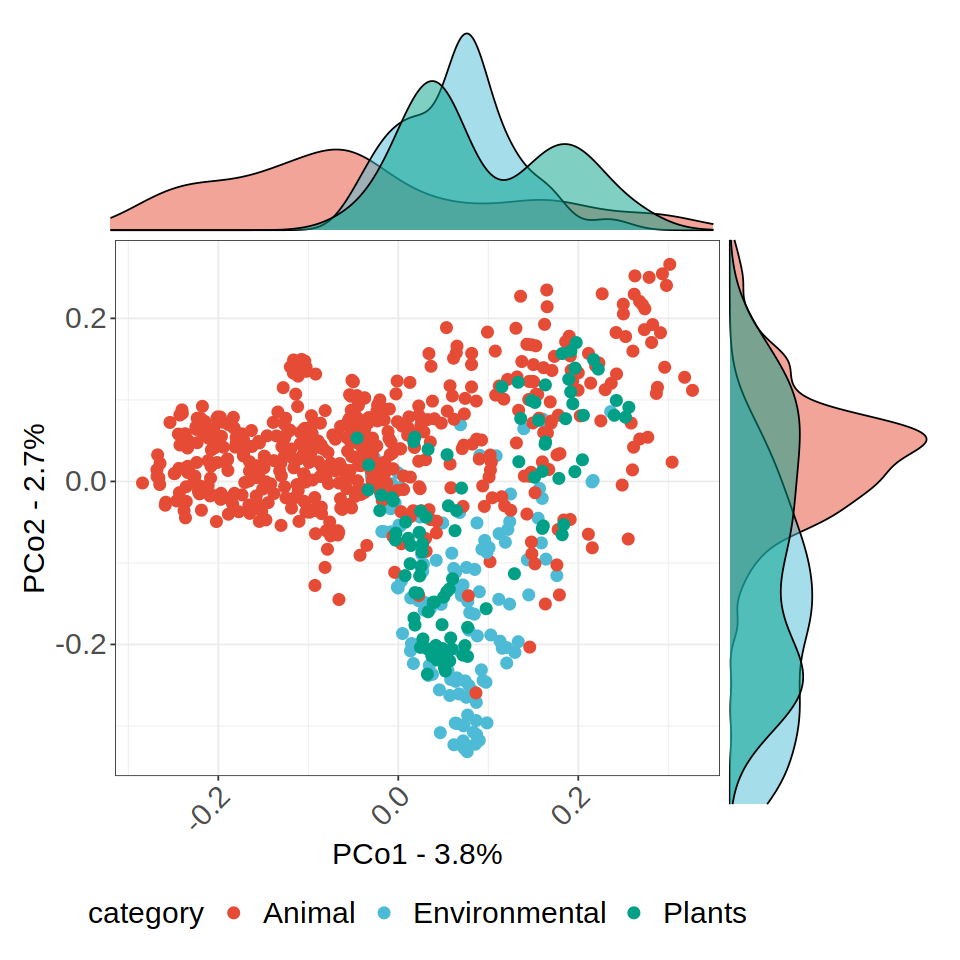

In [1289]:
options(repr.plot.width=8,repr.plot.height=8)
all.plot.jaccard

In [1033]:
kruskal.test(Axis.1~category,data=jaccard.vector)


	Kruskal-Wallis rank sum test

data:  Axis.1 by category
Kruskal-Wallis chi-squared = 136.46, df = 2, p-value < 2.2e-16


In [1034]:
pairwise.wilcox.test(jaccard.vector$Axis.1, jaccard.vector$category, p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  jaccard.vector$Axis.1 and jaccard.vector$category 

              Animal Environmental
Environmental <2e-16 -            
Plants        <2e-16 0.08         

P value adjustment method: fdr 

##### Weighted-UniFrac distance

In [1239]:
bray.vector = as.data.frame(wunifrac.dist.filt$vectors) %>% 
rownames_to_column(var="Sample")%>%
inner_join(mapping_ps_All_richness)

Joining, by = "Sample"


In [1306]:
bray.axis1 = ggplot(data=bray.vector, aes(x=Axis.1,fill=category))+
    geom_density(alpha=0.5)+
    scale_fill_npg()+
    theme_void()+
    guides(fill="none")+theme(axis.title.x=element_blank(),
				axis.text=element_blank(),
				axis.line=element_blank(),
				axis.ticks=element_blank())

bray.axis2 = ggplot(data=bray.vector, aes(x=Axis.2,fill=category))+
geom_density(alpha=0.5)+
    scale_fill_npg()+
    theme_void()+
    guides(fill="none")+coord_flip()+theme(axis.title.y=element_blank(),
				axis.text=element_blank(),
				axis.line=element_blank(),
				axis.ticks=element_blank())

In [1308]:
bray.cat = wunifrac.category+
theme(legend.position="bottom")+
labs(title=NULL,
    x="PCoA1 - 30.2%",
    y="PCoA2 - 10.5%")+
labels.x + labels.y

In [1309]:
bray.axis1 = bray.axis1 + theme(plot.margin = unit(c(0.5, -0.5, 0, 1.7), "cm"))
bray.cat = bray.cat + theme(plot.margin = unit(c(0, 0, 0.5, 0.5), "cm"))
bray.axis2 = bray.axis2 + theme(plot.margin = unit(c(-0.6, 0.5, 3.2, 0), "cm"))


In [1310]:
axis1 = plot_grid(bray.axis1, bray.cat, ncol = 1, rel_heights = c(1, 3))
axis2 = plot_grid(NULL, bray.axis2, ncol = 1, rel_heights = c(1, 3))
all.plot.bray = plot_grid(axis1, axis2, ncol = 2, rel_widths = c(3, 1))

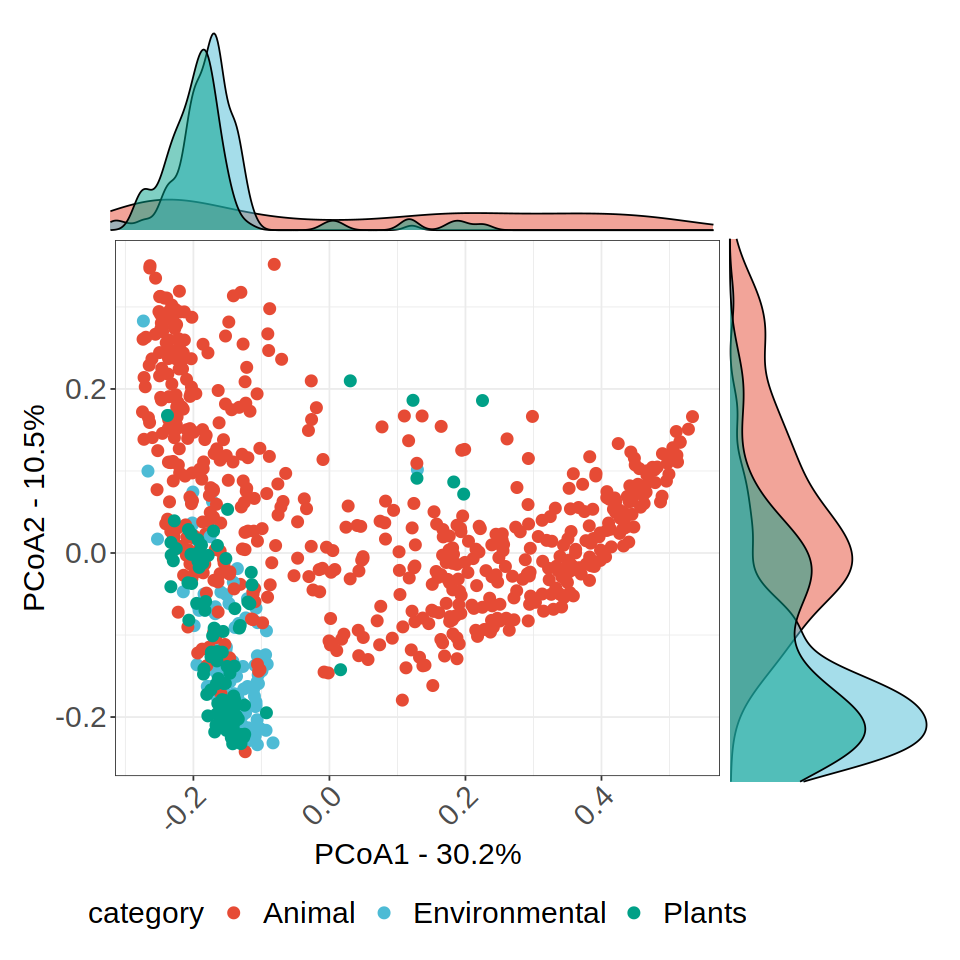

In [1311]:
options(repr.plot.width=8,repr.plot.height=8)
all.plot.bray

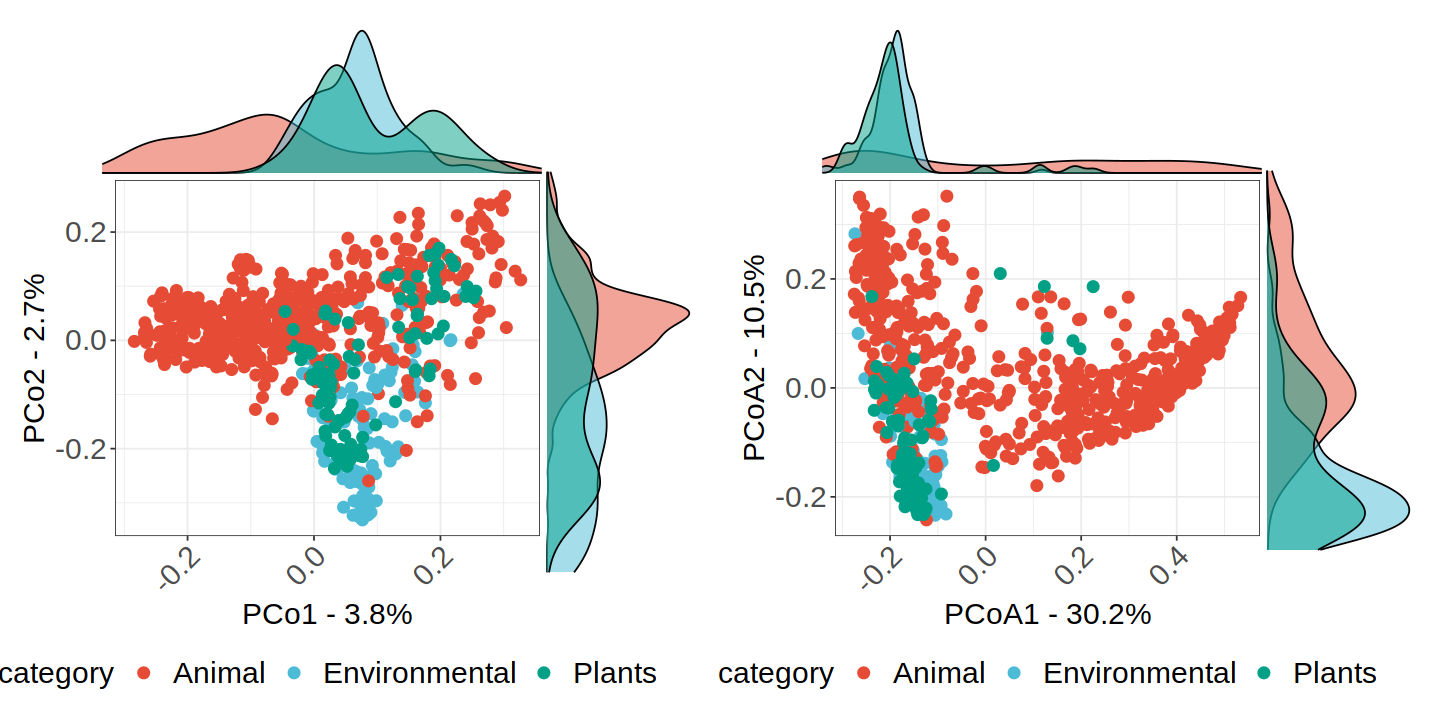

In [1312]:
options(repr.plot.width=12,repr.plot.height=6)
grid.arrange(all.plot.jaccard,
            all.plot.bray,
            nrow=1)

#### By biome 2

In [921]:
#Generate plots
jaccard.biome2 = plot_color_by(filter_taxa_All_count,jaccard.dist.filt,"biome_2")
bray.biome2 = plot_color_by(filter_taxa_All_count,bray.dist.filt,"biome_2")
unifrac.biome2 = plot_color_by(filter_taxa_All_count,unifrac.dist.filt,"biome_2")
wunifrac.biome2 = plot_color_by(filter_taxa_All_count,wunifrac.dist.filt,"biome_2")

Warning message:
“Removed 17 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 17 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 17 rows containing missing values (`geom_point()`).”


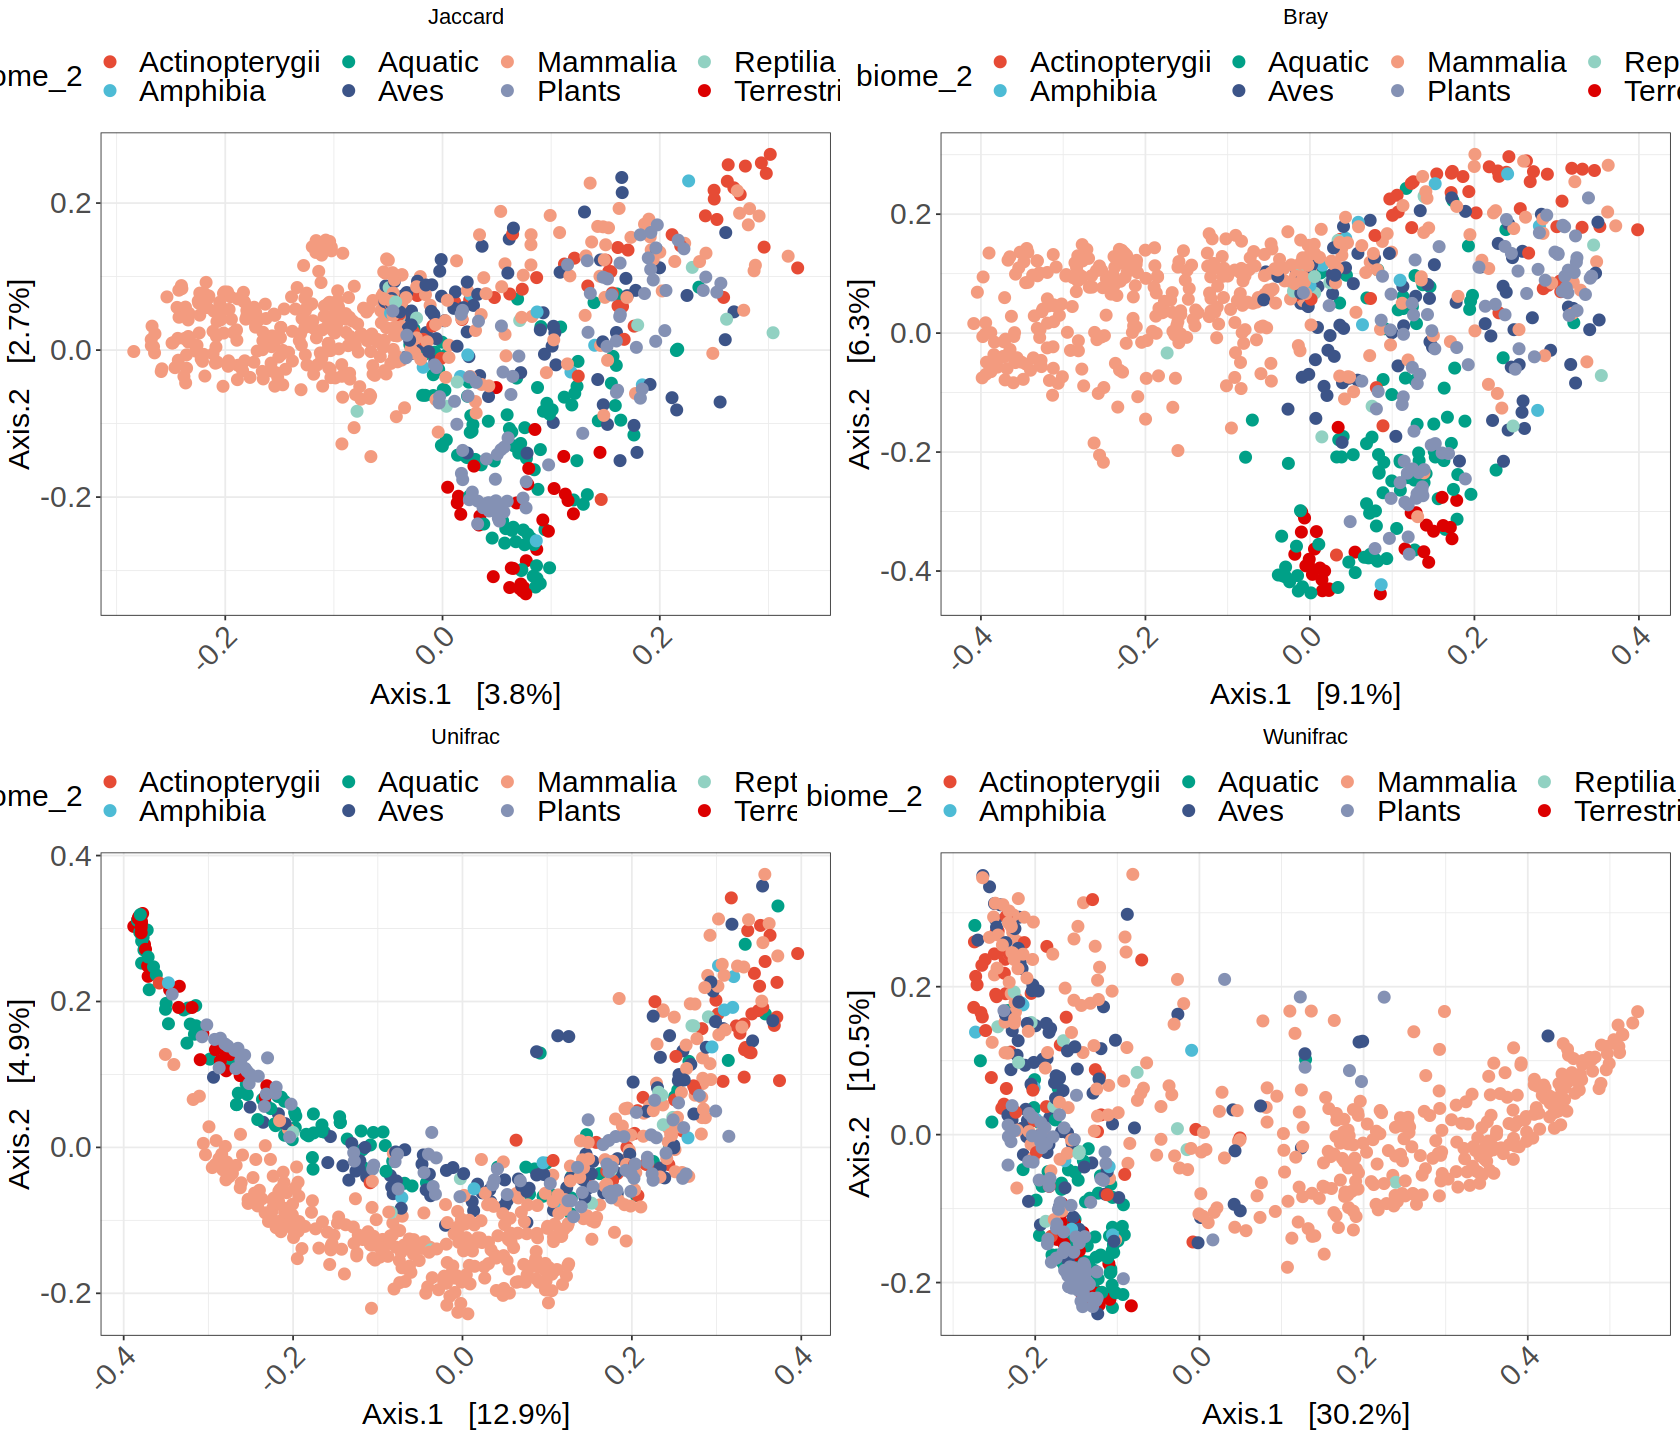

In [1012]:
options(repr.plot.width=14,repr.plot.height=12)
grid.arrange(jaccard.biome2,
             bray.biome2,
             unifrac.biome2,
             wunifrac.biome2,
             nrow=2)

#### Map mammals

In [129]:
#Generate plots - coloring mammals
jaccard.mammals = plot_color_by(filter_taxa_All_count,jaccard.dist.filt,"mammals")
bray.mammals = plot_color_by(filter_taxa_All_count,bray.dist.filt,"mammals")
unifrac.mammals = plot_color_by(filter_taxa_All_count,unifrac.dist.filt,"mammals")
wunifrac.mammals = plot_color_by(filter_taxa_All_count,wunifrac.dist.filt,"mammals")

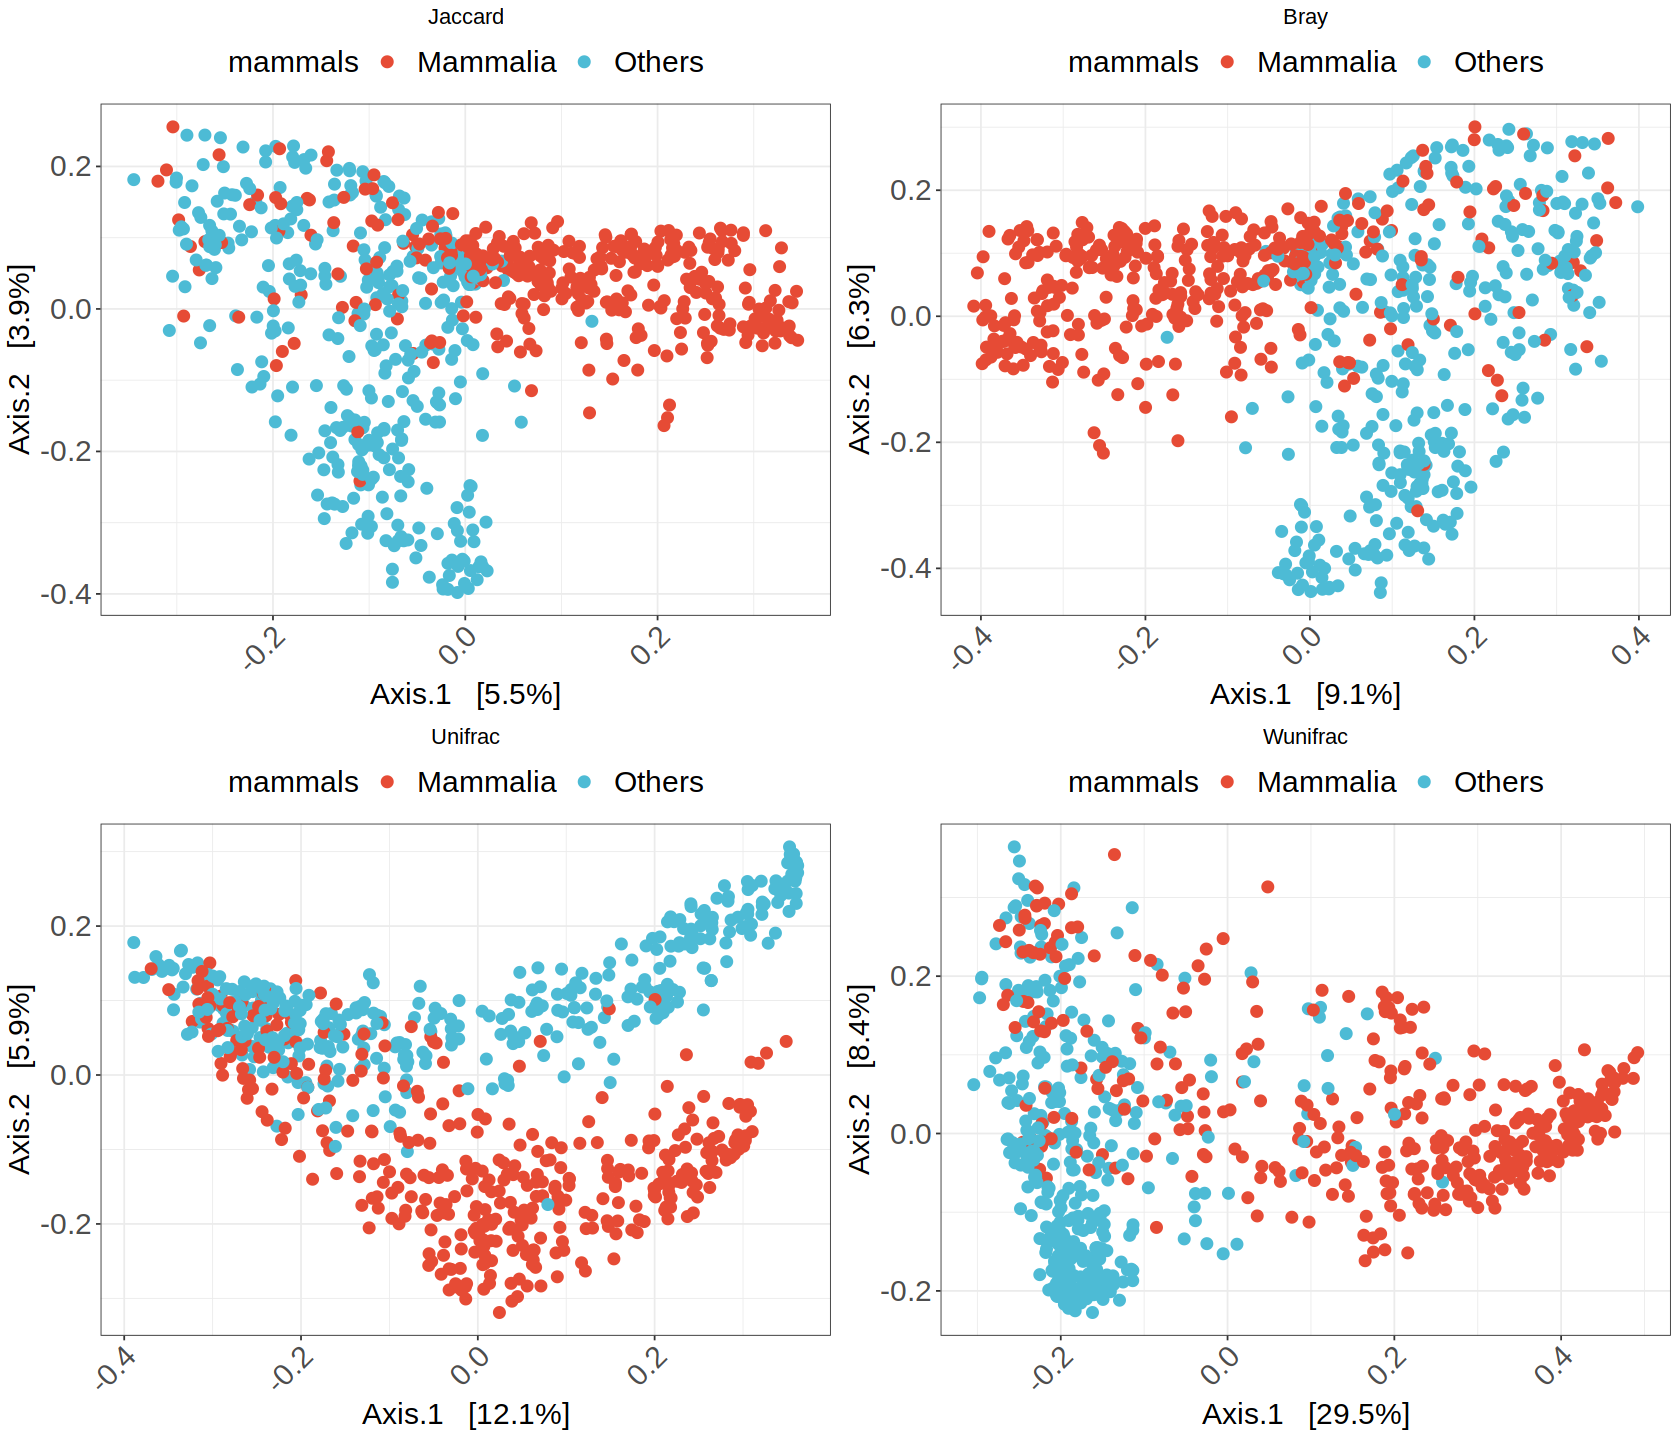

In [130]:
options(repr.plot.width=14,repr.plot.height=12)
grid.arrange(jaccard.mammals,
             bray.mammals,
             unifrac.mammals,
             wunifrac.mammals,
             nrow=2)

#### Color by alpha diversity

In [132]:
#Function to plot specificing ordination matrix and mapping value
plot_colorby_axes = function(physeq_obj,ordination.matrix,color_by,axes = NULL){
    #Define axes to plot
    if(is.null(axes)){
        axes = 1:2 
    }

    #Get the name of the metric for the plot title
    metric = deparse(substitute(ordination.matrix))
    title = strsplit(metric,".",fixed=TRUE)[[1]][1]
    title = paste(toupper(substr(title,1,1)),substr(title,2,nchar(title)),sep = "")
    #str_to_title(title) --> doesn't work, stringr package corrupt, meanwhile use another option
    #Create ordination plot
    ordination.plot  = plot_ordination(
                 physeq = physeq_obj,
                 ordination = ordination.matrix,
                 type = "samples",
                 color = color_by,
                 axes = axes)+
                theme_bw()+
                geom_point(size = 3)+
                theme(legend.position = "top")+
                scale_color_viridis() +
                ggtitle(title)+
                theme(plot.title = element_text(hjust = 0.5))+
                labels.x + labels.y + labels.legend
    return(ordination.plot)
    
}

In [133]:
#Generate plots - coloring by Shannon index
jaccard.shannon = plot_colorby_axes(filter_taxa_All_count,jaccard.dist.filt,"Shannon")
bray.shannon = plot_colorby_axes(filter_taxa_All_count,bray.dist.filt,"Shannon")
unifrac.shannon = plot_colorby_axes(filter_taxa_All_count,unifrac.dist.filt,"Shannon")
wunifrac.shannon = plot_colorby_axes(filter_taxa_All_count,wunifrac.dist.filt,"Shannon")

Warning message in plot_ordination(physeq = physeq_obj, ordination = ordination.matrix, :
“Color variable was not found in the available data you provided.No color mapped.”
Warning message in plot_ordination(physeq = physeq_obj, ordination = ordination.matrix, :
“Color variable was not found in the available data you provided.No color mapped.”
Warning message in plot_ordination(physeq = physeq_obj, ordination = ordination.matrix, :
“Color variable was not found in the available data you provided.No color mapped.”
Warning message in plot_ordination(physeq = physeq_obj, ordination = ordination.matrix, :
“Color variable was not found in the available data you provided.No color mapped.”


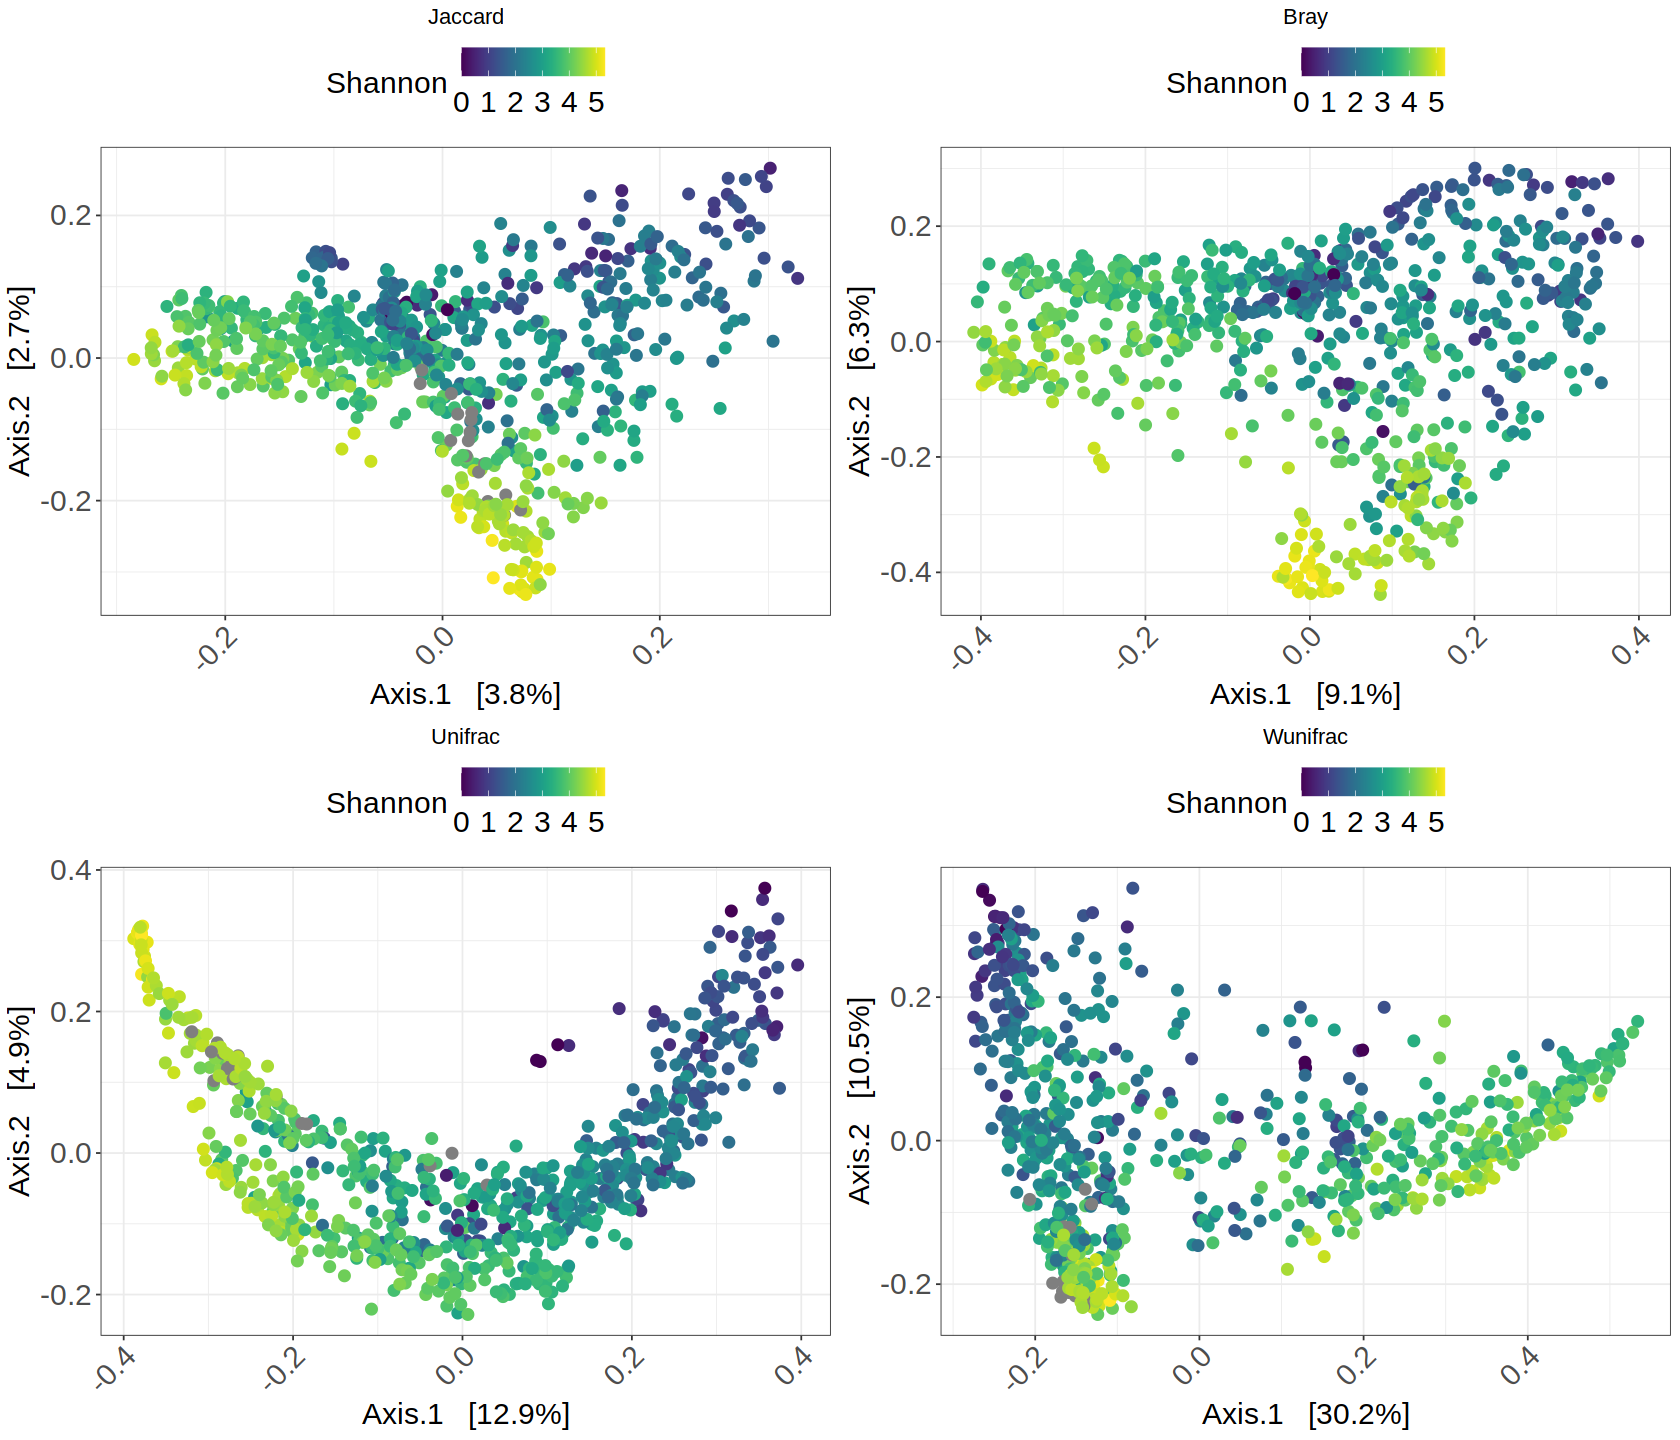

In [1010]:
options(repr.plot.width=14,repr.plot.height=12)
grid.arrange(jaccard.shannon,
             bray.shannon,
             unifrac.shannon,
             wunifrac.shannon,
             nrow=2)

In [1007]:
#Generate plots - coloring by Shannon index
jaccard.shannon.pca1.3 = plot_colorby_axes(filter_taxa_All,jaccard.dist.filt,"Shannon",axes = c(2,3))
bray.shannon.pca1.3 = plot_colorby_axes(filter_taxa_All,bray.dist.filt,"Shannon",axes = c(2,3))
unifrac.shannon.pca1.3 = plot_colorby_axes(filter_taxa_All,unifrac.dist.filt,"Shannon",axes = c(2,3))
wunifrac.shannon.pca1.3 = plot_colorby_axes(filter_taxa_All,wunifrac.dist.filt,"Shannon",axes = c(2,3))

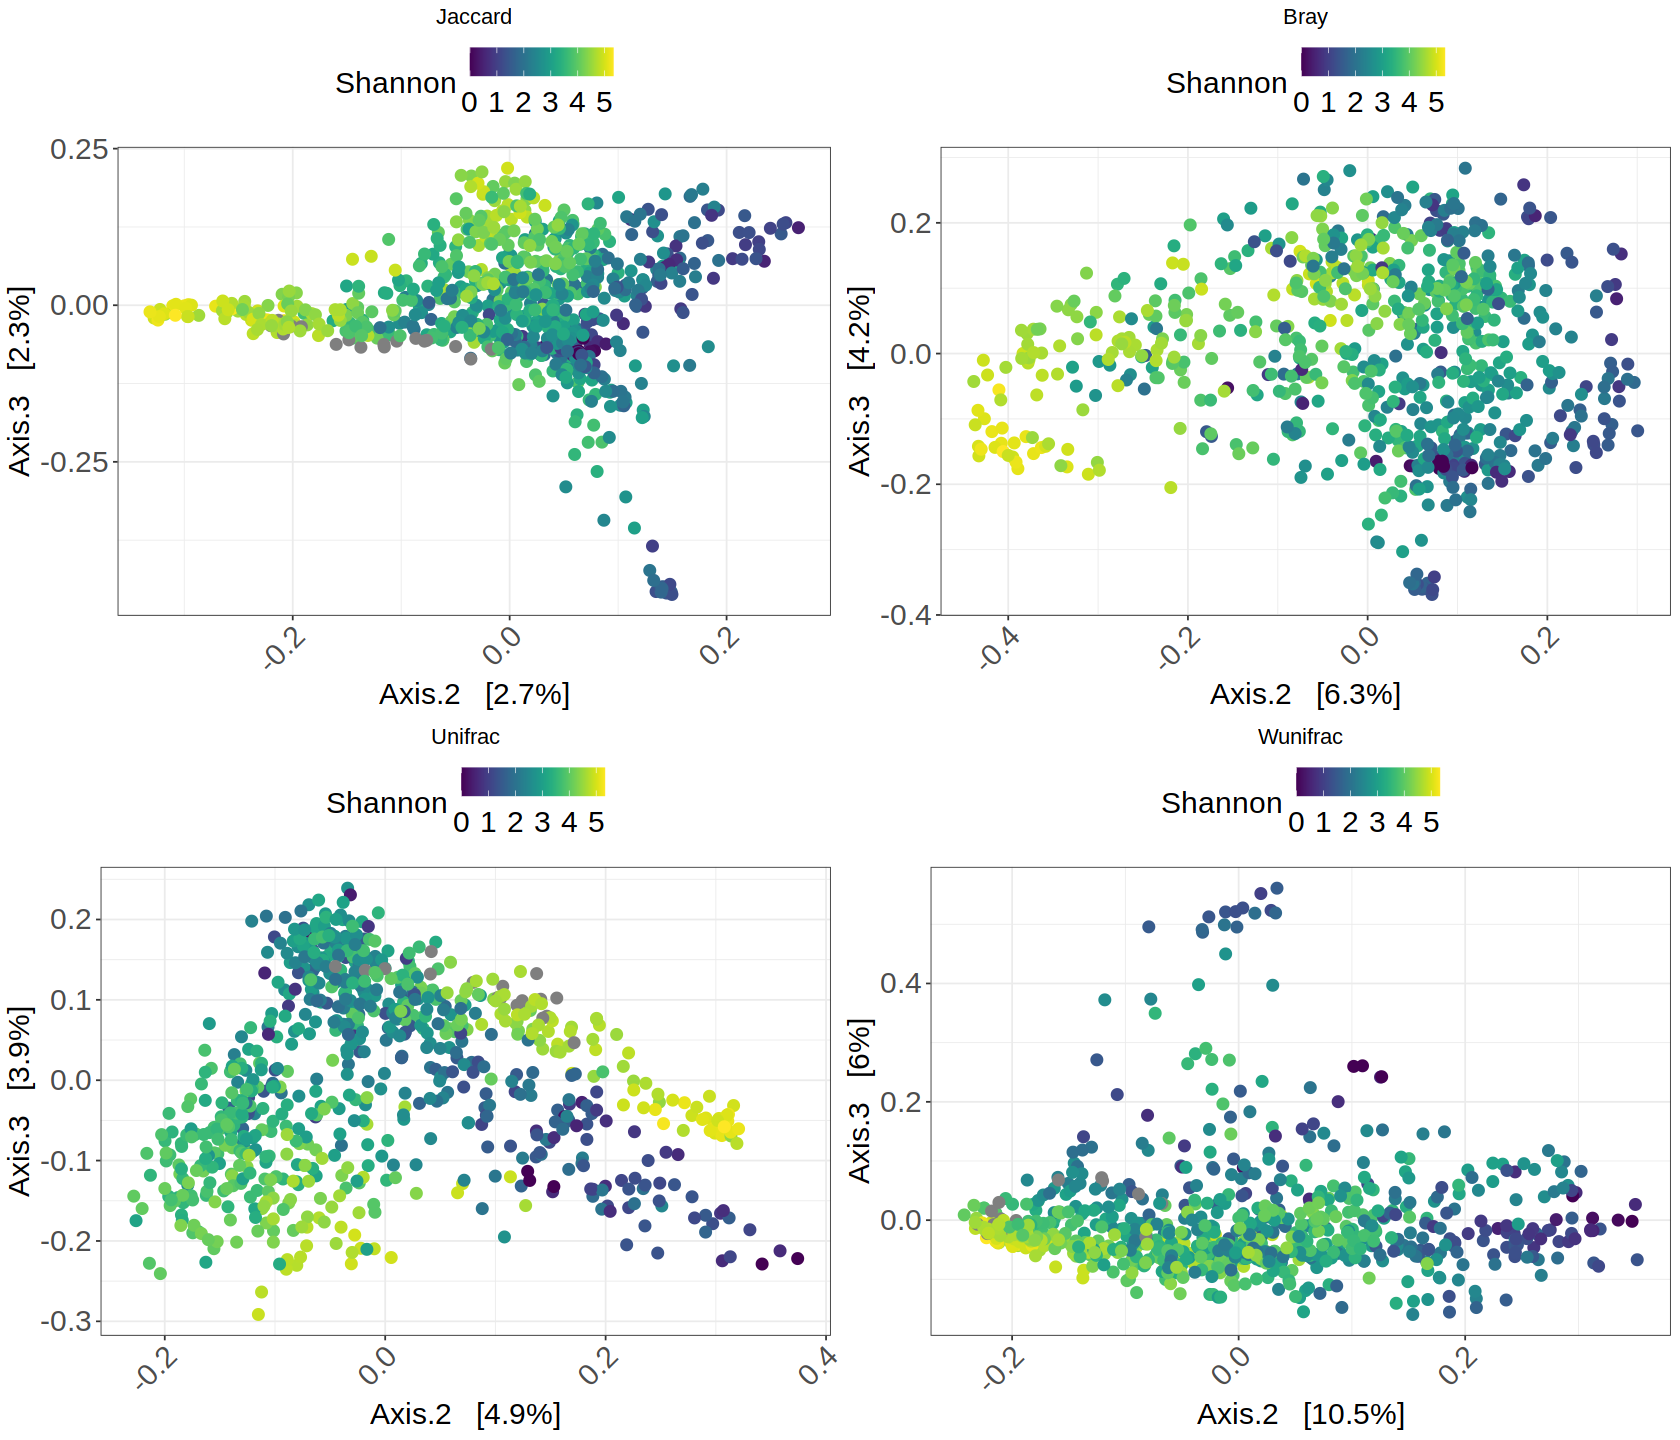

In [1009]:
options(repr.plot.width=14,repr.plot.height=12)
grid.arrange(jaccard.shannon.pca1.3,
             bray.shannon.pca1.3,
             unifrac.shannon.pca1.3,
             wunifrac.shannon.pca1.3,
             nrow=2)

### Pairwise dissimilarities

#### By biome_1

In [50]:
diss.jacc1=phyloseq_group_dissimilarity(filter_taxa_All,group="biome_1",method="jaccard",between_groups = TRUE)+ggtitle("Jaccard")+labels.x + labels.y + labels.legend+scale_fill_npg()+theme(axis.text.x = element_text(angle=45))+theme(legend.position = "none")

diss.unifrac1=phyloseq_group_dissimilarity(filter_taxa_All,group="biome_1",method="unifrac",between_groups = TRUE)+ggtitle("uUniFrac")+labels.x + labels.y + labels.legend+scale_fill_npg()+theme(axis.text.x = element_text(angle=45))+theme(legend.position = "none")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



#### By category

In [51]:
diss.jaccard.cat=phyloseq_group_dissimilarity(filter_taxa_All,group="category",method="jaccard",between_groups = TRUE)+ggtitle("uUniFrac")+labels.x + labels.y + labels.legend+scale_fill_npg()+theme(axis.text.x = element_text(angle=45))+theme(legend.position = "none")

diss.unifrac.cat=phyloseq_group_dissimilarity(filter_taxa_All,group="category",method="unifrac",between_groups = TRUE)+ggtitle("uUniFrac")+labels.x + labels.y + labels.legend+scale_fill_npg()+theme(axis.text.x = element_text(angle=45))+theme(legend.position = "none")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



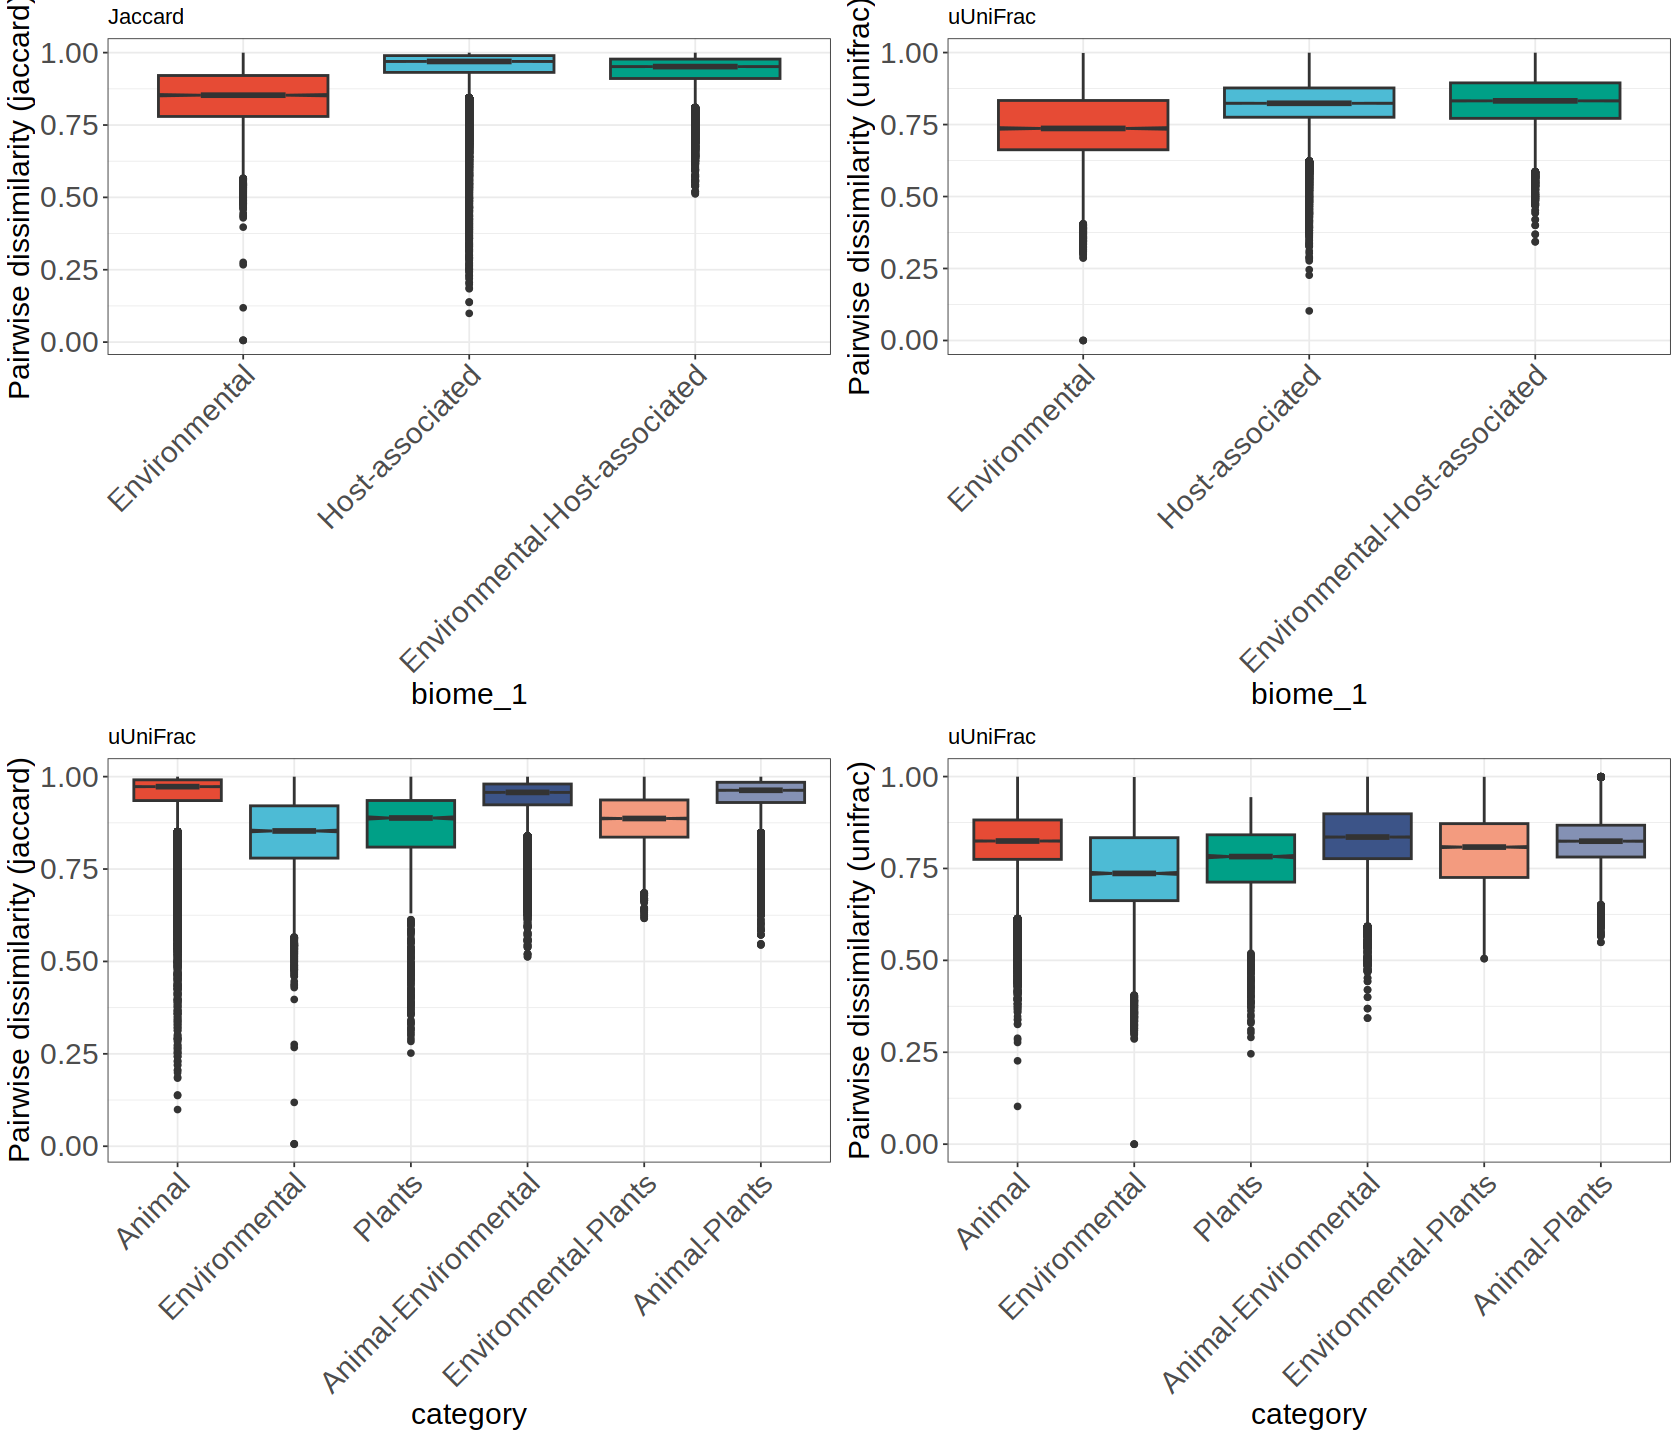

In [1015]:
options(repr.plot.width=14,repr.plot.height=12)
grid.arrange(diss.jacc1,
             diss.unifrac1,
             diss.jaccard.cat,
             diss.unifrac.cat,
             nrow=2)

### OTU tree

In [53]:
otu.tre=plot_tree(filter_taxa_All_count,color="category",label.tips="taxa_names")+scale_color_npg()

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



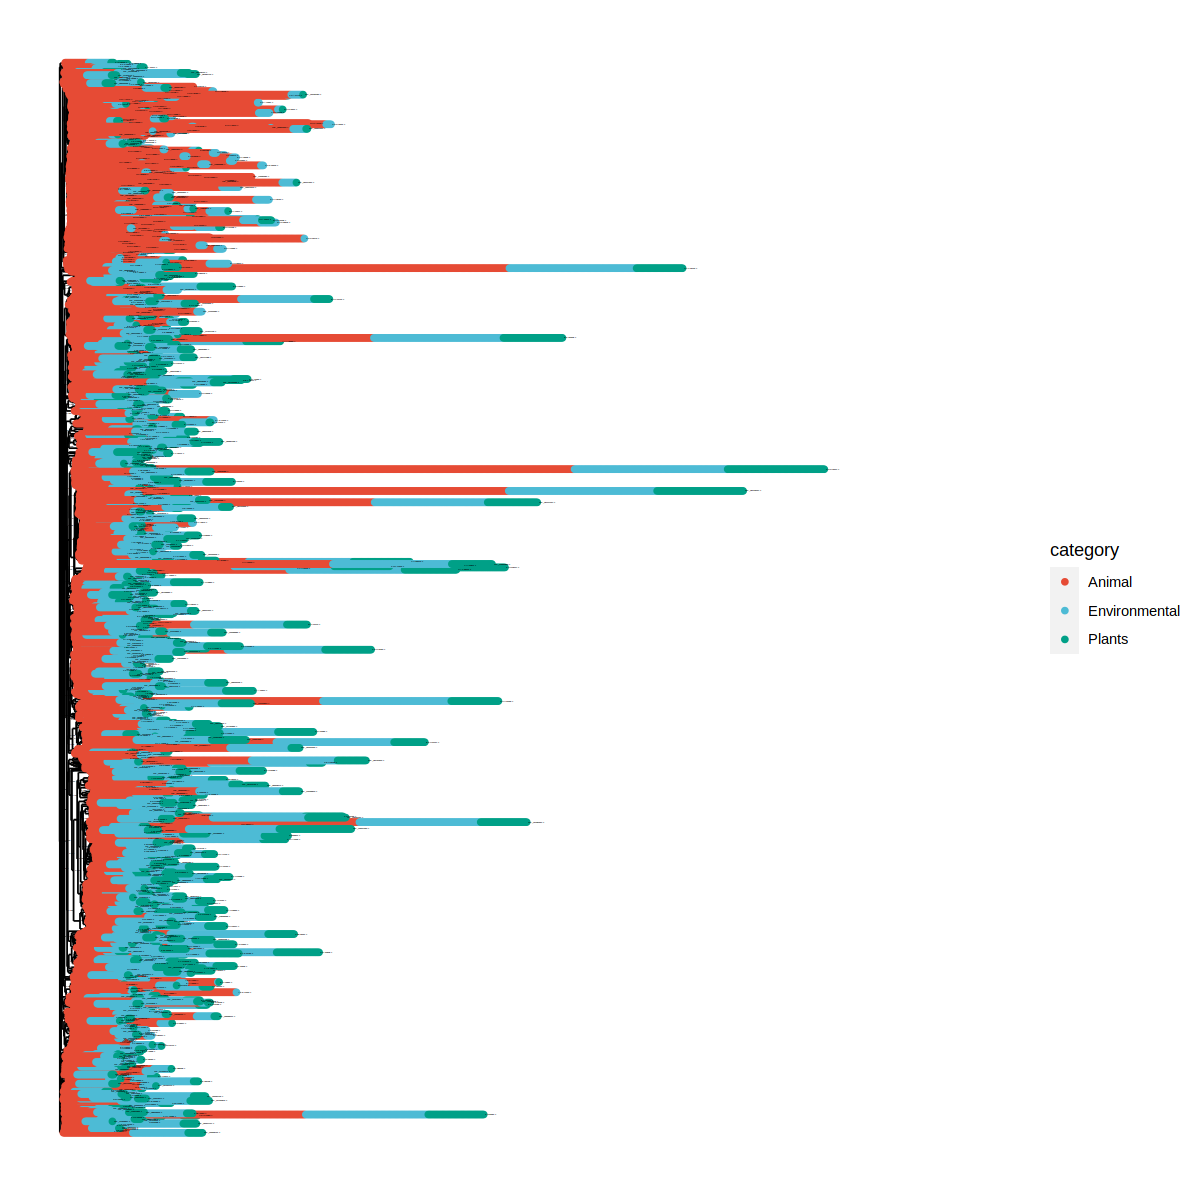

In [54]:
options(repr.plot.width=10,repr.plot.height=10)
otu.tre

In [128]:
tre.top.0.1=plot_tree(phyloseq_filter_top_taxa(filter_taxa_All_count,perc=0.1),color="category",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 0.1%")

tre.top.1=plot_tree(phyloseq_filter_top_taxa(filter_taxa_All_count,perc=1),color="category",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 1%")

tre.top.5=plot_tree(phyloseq_filter_top_taxa(filter_taxa_All_count,perc=5),color="category",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 5%")

tre.top.10=plot_tree(phyloseq_filter_top_taxa(filter_taxa_All_count,perc=10),color="category",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 10%")


Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”


ERROR: Error in plot_tree(phyloseq_filter_top_taxa(filter_taxa_All_count, perc = 0.1), : There is no phylogenetic tree in the object you have provided.
Try phy_tree(physeq) to see for yourself.


In [ ]:
options(repr.plot.width=18,repr.plot.height=15)
grid.arrange(tre.top.0.1,
             tre.top.1,
             tre.top.5,
             tre.top.10,
             nrow=2)

### Plot OTUs network

In [ ]:
plot_net(filter_taxa_All_count, maxdist=0.4, color="Dataset", shape="category")